In [312]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style, init
from PIL import Image
from os import listdir
from pathlib import Path


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
train_df = pd.read_csv('train_rles.csv')

## Анализ обучающей выборки
**Число картинок в обучающей выборке**

In [17]:
train_df.shape[0]

7429

In [150]:
train_df['data_set'] = train_df['id'].map(lambda x: x[:-5] )
train_df['kidney'] = train_df['id'].map(lambda x: '_'.join(x.split('_')[:2] ))
train_df['type'] = train_df['id'].map(lambda x: x.split('_')[2] )
train_df['img'] = train_df['id'].map(lambda x: x.split('_')[-1] )
train_df['mask_is_empty'] = train_df['rle'] == '1 0'


In [242]:
df_mask_empty =  train_df.groupby('data_set')['mask_is_empty'].value_counts(normalize=True) * 100
df_mask_empty = df_mask_empty.rename('percent').reset_index()

<Figure size 1400x1000 with 0 Axes>

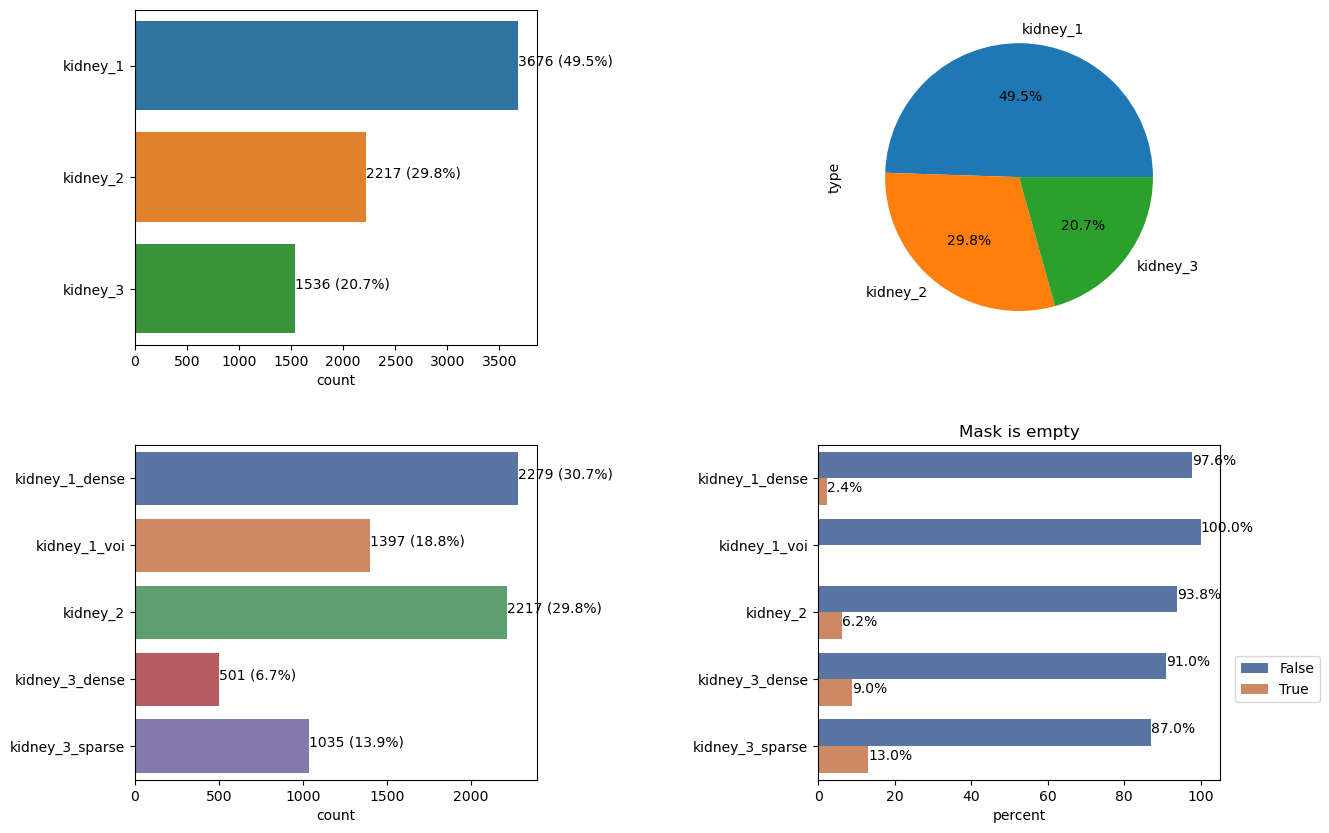

In [287]:
plt.figure(figsize(14,10))

fig, ax = plt.subplots(nrows=2, ncols=2)

sns.barplot(y="kidney", x="type",  
            data= pd.DataFrame(train_df[['data_set',	'kidney',	'type',	'rle']].groupby(['kidney'])['type'].count()).reset_index(), hue = 'kidney', 
           ax = ax[0,0]);
for patch in ax[0,0].patches:
    # Variables
    height = patch.get_height() 
    width = patch.get_width()
    percent = 100*width/len(train_df)
    y_pos = patch.get_y()
    text = f'{int(width)} ({percent:.1f}%)'
    ax[0,0].text(width,  y_pos + height/2, text)
ax[0,0].set_xlabel('count')
ax[0,0].set_ylabel('')

pd.DataFrame(train_df[['data_set',	'kidney',	'type',	'rle']]\
             .groupby(['kidney'])['type'].count()).reset_index().set_index('kidney')\
            .plot.pie(y='type', autopct='%.1f%%', legend=False, ax = ax[0,1])
plt.ylabel('');
plt.xlabel('');

sns.countplot(data = train_df, y = 'data_set', hue = 'data_set', palette="deep", ax = ax[1,0])
for patch in ax[1,0].patches:
    # Variables
    height = patch.get_height()
    width = patch.get_width()
    percent = 100*width/len(train_df)
    y_pos = patch.get_y()
    text = f'{int(width)} ({percent:.1f}%)'
    ax[1,0].text(width ,  y_pos + height/2, text)
ax[1,0].set_xlabel('count')
ax[1,0].set_ylabel('')

sns.barplot(data = df_mask_empty , x = 'percent',
              y = 'data_set',  hue = 'mask_is_empty', palette="deep" , ax = ax[1,1])
ax[1,1].legend(bbox_to_anchor=(1.02, 0.3), loc='center left')
ax[1,1].set_ylabel('')
ax[1,1].set_title("Mask is empty")
for patch in ax[1,1].patches:
    height = patch.get_height() 
    y_loc = patch.get_y()
    width = patch.get_width()
    if width == 0:
        continue

    ax[1,1].text(width, y_loc + height/2, f'{width:.1f}%')
plt.subplots_adjust(wspace = 0.7, hspace = 0.3);
plt.show();

In [283]:
train_df.head()

,id,rle,data_set,kidney,type,img,mask_is_empty
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000,True
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001,True
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002,True
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003,True
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004,True


## Kidney_1

https://www.kaggle.com/code/shreydan/first-look-monai-animations-rle

https://www.kaggle.com/code/allunia/eda-hacking-the-human-vasculature-in-3d

https://www.kaggle.com/code/rafiko1/sennet-hoa-eda-animation/notebook#Next-steps



In [510]:
class ImagesDataset:
    def __init__(
        self,
        path,
        df

    ):
        super().__init__()
        path = Path(path)
        self.df = df.copy()
        
        
        self.path_to_images = path / 'images'
        self.name_images = list(self.path_to_images.rglob("*.tif"))
        self.df['images'] = self.name_images 
        
        assert all(kidney_1.df['img'] == kidney_1.df['images'].apply(lambda x: x.name[:-4])), 'images did not match the data frame!'
        self.df['images_width'] = self.df['images'].apply(lambda x: Image.open(x).size[0]) 
        self.df['images_height'] = self.df['images'].apply(lambda x: Image.open(x).size[1]) 


        self.path_to_labels = path / 'labels'
        self.name_labels = list(self.path_to_labels.rglob("*.tif"))
        self.df.loc[:, 'labels'] = ''
        self.df['labels'] = self.name_labels
        
        assert all(kidney_1.df['img'] == kidney_1.df['labels'].apply(lambda x: x.name[:-4])), 'labels did not match the data frame!'
        self.df['labels_width'] = self.df['labels'].apply(lambda x: Image.open(x).size[0]) 
        self.df['labels_height'] = self.df['labels'].apply(lambda x: Image.open(x).size[1]) 
        #width, height = im.size
        
        

    

In [511]:
path = "train/kidney_1_dense"
kidney_1 = ImagesDataset(path, train_df[(train_df['kidney'] == 'kidney_1') & (train_df['type'] == 'dense')].copy())


In [512]:
kidney_1.df

,id,rle,data_set,kidney,type,img,mask_is_empty,images,images_width,images_height,labels,labels_width,labels_height
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000,True,train\kidney_1_dense\images\0000.tif,912,1303,train\kidney_1_dense\labels\0000.tif,912,1303
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001,True,train\kidney_1_dense\images\0001.tif,912,1303,train\kidney_1_dense\labels\0001.tif,912,1303
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002,True,train\kidney_1_dense\images\0002.tif,912,1303,train\kidney_1_dense\labels\0002.tif,912,1303
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003,True,train\kidney_1_dense\images\0003.tif,912,1303,train\kidney_1_dense\labels\0003.tif,912,1303
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004,True,train\kidney_1_dense\images\0004.tif,912,1303,train\kidney_1_dense\labels\0004.tif,912,1303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,kidney_1_dense_2274,711995 1 712906 2 713817 2 714729 1 715641 1 7...,kidney_1_dense,kidney_1,dense,2274,False,train\kidney_1_dense\images\2274.tif,912,1303,train\kidney_1_dense\labels\2274.tif,912,1303
2275,kidney_1_dense_2275,1 0,kidney_1_dense,kidney_1,dense,2275,True,train\kidney_1_dense\images\2275.tif,912,1303,train\kidney_1_dense\labels\2275.tif,912,1303
2276,kidney_1_dense_2276,1 0,kidney_1_dense,kidney_1,dense,2276,True,train\kidney_1_dense\images\2276.tif,912,1303,train\kidney_1_dense\labels\2276.tif,912,1303
2277,kidney_1_dense_2277,1 0,kidney_1_dense,kidney_1,dense,2277,True,train\kidney_1_dense\images\2277.tif,912,1303,train\kidney_1_dense\labels\2277.tif,912,1303


In [461]:
kidney_1.df['images'].apply(lambda x: Image.open(x).size[0])

0       912
1       912
2       912
3       912
4       912
       ... 
2274    912
2275    912
2276    912
2277    912
2278    912
Name: images, Length: 2279, dtype: int64

In [454]:
all(kidney_1.df['img'] == kidney_1.df['images'].apply(lambda x: x.name[:-4]))

True

In [455]:
kidney_1.df['images'].apply(lambda x: x.name[:-4])

0       0000
1       0001
2       0002
3       0003
4       0004
        ... 
2274    2274
2275    2275
2276    2276
2277    2277
2278    2278
Name: images, Length: 2279, dtype: object

In [406]:
x.loc[:, 6] = kidney_1.name_images

C:\Users\123\AppData\Local\Temp\ipykernel_9960\2453138056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 6] = kidney_1.name_images


In [407]:
x

,id,rle,data_set,kidney,type,img,mask_is_empty,3,6
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000,True,train\kidney_1_dense\images\0000.tif,train\kidney_1_dense\images\0000.tif
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001,True,train\kidney_1_dense\images\0001.tif,train\kidney_1_dense\images\0001.tif
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002,True,train\kidney_1_dense\images\0002.tif,train\kidney_1_dense\images\0002.tif
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003,True,train\kidney_1_dense\images\0003.tif,train\kidney_1_dense\images\0003.tif
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004,True,train\kidney_1_dense\images\0004.tif,train\kidney_1_dense\images\0004.tif
...,...,...,...,...,...,...,...,...,...
2274,kidney_1_dense_2274,711995 1 712906 2 713817 2 714729 1 715641 1 7...,kidney_1_dense,kidney_1,dense,2274,False,train\kidney_1_dense\images\2274.tif,train\kidney_1_dense\images\2274.tif
2275,kidney_1_dense_2275,1 0,kidney_1_dense,kidney_1,dense,2275,True,train\kidney_1_dense\images\2275.tif,train\kidney_1_dense\images\2275.tif
2276,kidney_1_dense_2276,1 0,kidney_1_dense,kidney_1,dense,2276,True,train\kidney_1_dense\images\2276.tif,train\kidney_1_dense\images\2276.tif
2277,kidney_1_dense_2277,1 0,kidney_1_dense,kidney_1,dense,2277,True,train\kidney_1_dense\images\2277.tif,train\kidney_1_dense\images\2277.tif


In [392]:
len(kidney_1.name_images)

2279

In [375]:
kidney_1.name_images[0].name

'0000.tif'

In [370]:
Path('train/kidney_1_dense/images/2278.tif') in kidney_1.name_images

True

In [371]:
 '1' in kidney_1.name_images

False

In [372]:
kidney_1.df

,id,rle,data_set,kidney,type,img,mask_is_empty
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000,True
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001,True
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002,True
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003,True
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004,True
...,...,...,...,...,...,...,...
2274,kidney_1_dense_2274,711995 1 712906 2 713817 2 714729 1 715641 1 7...,kidney_1_dense,kidney_1,dense,2274,False
2275,kidney_1_dense_2275,1 0,kidney_1_dense,kidney_1,dense,2275,True
2276,kidney_1_dense_2276,1 0,kidney_1_dense,kidney_1,dense,2276,True
2277,kidney_1_dense_2277,1 0,kidney_1_dense,kidney_1,dense,2277,True


In [327]:
len(listdir(path))

2

In [355]:
x = train_df[(train_df['kidney'] == 'kidney_1') & (train_df['type'] == 'dense')]

In [358]:
x.loc[:, 3] = list(range(2279))

C:\Users\123\AppData\Local\Temp\ipykernel_9960\464871486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 3] = list(range(2279))


In [359]:
x

,id,rle,data_set,kidney,type,img,mask_is_empty,3
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000,True,0
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001,True,1
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002,True,2
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003,True,3
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004,True,4
...,...,...,...,...,...,...,...,...
2274,kidney_1_dense_2274,711995 1 712906 2 713817 2 714729 1 715641 1 7...,kidney_1_dense,kidney_1,dense,2274,False,2274
2275,kidney_1_dense_2275,1 0,kidney_1_dense,kidney_1,dense,2275,True,2275
2276,kidney_1_dense_2276,1 0,kidney_1_dense,kidney_1,dense,2276,True,2276
2277,kidney_1_dense_2277,1 0,kidney_1_dense,kidney_1,dense,2277,True,2277


In [294]:
im = '0000.tif'

In [459]:
img = Image.open(f"{path}images/{im}")

FileNotFoundError: [Errno 2] No such file or directory: 'train/kidney_1_denseimages/0000.tif'

In [451]:
img.size

(912, 1303)

In [ ]:
C:\Users\123\Desktop\human vasculature\train\kidney_1_dense\images

In [259]:
for patch in ax[1,1].patches:
    height = patch.get_height() 
    y_loc = patch.get_y()
    width = patch.get_width()
    if np.isnan(width):
        width = 0


    ax[1,1].text(width, y_loc + height/2, f'{width}%')
    

In [185]:
train_df.groupby('data_set')['mask_is_empty'].value_counts().rename('count').reset_index()

,data_set,mask_is_empty,count
0,kidney_1_dense,False,2225
1,kidney_1_dense,True,54
2,kidney_1_voi,False,1397
3,kidney_2,False,2079
4,kidney_2,True,138
5,kidney_3_dense,False,456
6,kidney_3_dense,True,45
7,kidney_3_sparse,False,900
8,kidney_3_sparse,True,135


<AxesSubplot:xlabel='count', ylabel='data_set'>

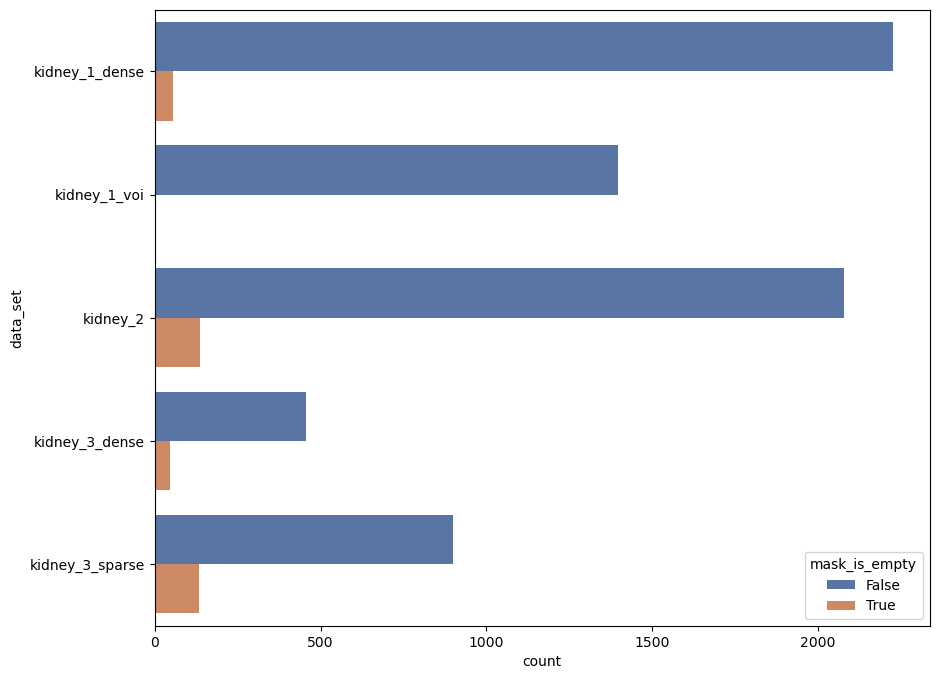

In [193]:
sns.barplot(data = train_df.groupby('data_set')['mask_is_empty'].value_counts().rename('count').reset_index() , x = 'count',
              
              y = 'data_set',  hue = 'mask_is_empty', palette="deep" )

In [179]:
train_df.groupby('data_set')['mask_is_empty'].value_counts().rename('count').reset_index()


,data_set,mask_is_empty,count
0,kidney_1_dense,False,2225
1,kidney_1_dense,True,54
2,kidney_1_voi,False,1397
3,kidney_2,False,2079
4,kidney_2,True,138
5,kidney_3_dense,False,456
6,kidney_3_dense,True,45
7,kidney_3_sparse,False,900
8,kidney_3_sparse,True,135


In [156]:
sns.barplot(data = train_df.groupby('data_set')['mask_is_empty'].value_counts(), x = 'mask_is_empty')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [ ]:
train_df

In [148]:
train_df

,id,rle,data_set,kidney,type,img
0,kidney_1_dense_0000,1 0,kidney_1_dense,kidney_1,dense,0000
1,kidney_1_dense_0001,1 0,kidney_1_dense,kidney_1,dense,0001
2,kidney_1_dense_0002,1 0,kidney_1_dense,kidney_1,dense,0002
3,kidney_1_dense_0003,1 0,kidney_1_dense,kidney_1,dense,0003
4,kidney_1_dense_0004,1 0,kidney_1_dense,kidney_1,dense,0004
...,...,...,...,...,...,...
7424,kidney_3_sparse_1030,1 0,kidney_3_sparse,kidney_3,sparse,1030
7425,kidney_3_sparse_1031,1 0,kidney_3_sparse,kidney_3,sparse,1031
7426,kidney_3_sparse_1032,1 0,kidney_3_sparse,kidney_3,sparse,1032
7427,kidney_3_sparse_1033,1 0,kidney_3_sparse,kidney_3,sparse,1033


In [145]:
ax[1,0].patches

<Axes.ArtistList of 5 patches>

<Axes.ArtistList of 3 patches>

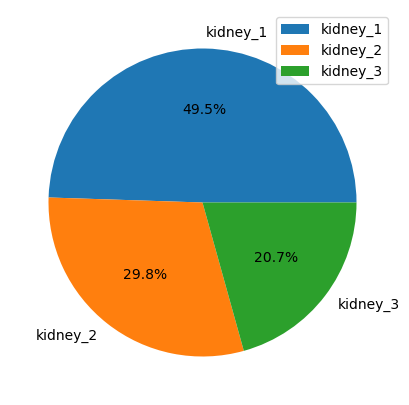

In [55]:
pd.DataFrame(train_df[['data_set',	'kidney',	'type',	'rle']].groupby(['kidney'])['type'].count()).reset_index().set_index('kidney').plot.pie(y='type', autopct='%.1f%%')
plt.ylabel('');
plt.xlabel('');

In [187]:
train_df[['data_set',	'kidney',	'type',	'rle']].groupby(['data_set',	'kidney',	'type'])['rle'].count()

data_set         kidney    type  
kidney_1_dense   kidney_1  dense     2279
kidney_1_voi     kidney_1  voi       1397
kidney_2         kidney_2  0000         1
                           0001         1
                           0002         1
                                     ... 
                           2214         1
                           2215         1
                           2216         1
kidney_3_dense   kidney_3  dense      501
kidney_3_sparse  kidney_3  sparse    1035
Name: rle, Length: 2221, dtype: int64

In [241]:
d = pd.DataFrame(train_df[['data_set',	'kidney',	'type',	'rle']].groupby(['kidney'])['type'].count()).reset_index()

In [242]:
d

,kidney,type
0,kidney_1,3676
1,kidney_2,2217
2,kidney_3,1536


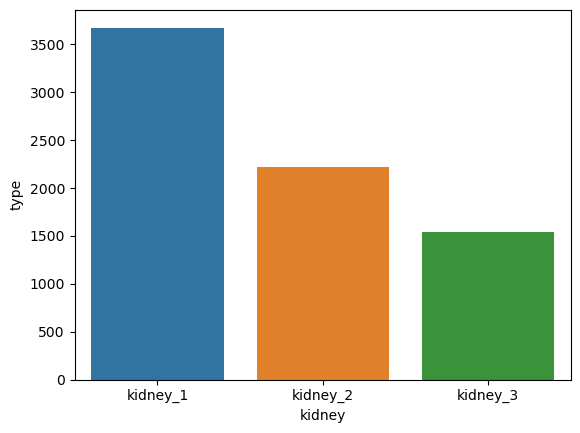

In [243]:
sns.barplot(x="kidney", y="type",  data= d, hue = 'kidney');

In [244]:
d.loc[:,['kidney',	'type']]

,kidney,type
0,kidney_1,3676
1,kidney_2,2217
2,kidney_3,1536


In [44]:
d.set_index('kidney').plot.pie(y='type', autopct='%.1f%%',labels=d.kidney)
plt.ylabel('');
plt.xlabel('');

NameError: name 'd' is not defined

https://www.youtube.com/watch?v=LG8lbm_W380

https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/Computer_Vision/run_length_encoding.ipynb

In [4]:



def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [19]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    print(s, 's')
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    print(starts, lengths)
    starts -= 1

In [20]:
img = np.array([[0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 0, 0]])
rle_decode(rle_encode(img), (4,4))

['5', '1', '10', '3', '15', '3', '21', '2'] s
[ 5 10 15 21] [1 3 3 2]


In [22]:
display(1)

1